# Exploratory Data Analysis (EDA)
by A4Ayub Data Science Labs (http://www.a4ayub.me)

***

## Definition

**Data Analysis** is the use of statistics and probability to figure out trends in the data set.

**Exploratory Data Analysis** is the first step in the Data Analysis process. In statistics, EDA is an approach to analyze data sets to summarize their main characteristics, often with visual methods.

<font color="red">**Please take note that the illustrations in this notebook is NOT for results/accuracy but for explaining the various concepts**</font>

## Need for EDA

When you are trying to build a machine learning model, you need to be pretty sure whether your data is making sense or not. The main aim of EDA is to obtain confidence in your data to an extent where you are ready to engage a machine learning algorithm.

Questions you will answer during the process of EDA:
1. Whether the selected features are good enough to the model
2. Are all the features required?
3. Are their any correlations based on which we can either go back to the Data Pre-processing step or move on to modelling

By completing the EDA process you will have many plots, heat-maps, frequency distribution, graphs, correlation matrix along with the hypothesis by which any individual can understand what your data is all about and what insights you got from exploring the data set

Through the process of EDA, we can ask to define the **problem statement** or definition on our data set which is normally very important.

## Steps for EDA

There are many steps for conducting  EDA. This highly depends on the data set being used. There is no one method for performing EDA. the ones i will use in the class are as below:
1. Import the required libraries for EDA
2. Loading the data into the data frame
3. Description of the data
  1. Checking the types of data
  2. Get and understand some statistics from the dataset e.g. central tendancy, count, mean, standard deviation, miimum values, maximum values, quartiles and the median e.t.c
4. Dropping irrelevant columns
5. Renaming the columns
6. Dropping the duplicate rows
7. Dropping the missing or null values
8. Detecting Outliers
9. Plot different features against one another (scatter plot)
10. Plot different features against their frequency (histogram)
11. Plotting Heat-maps
12. Deriving Insights and Conclusions that would guide the approach you take for training your machine learning algorithm as you build your machine learning model


## The data we shall use 

We will use a car dataset retrieved from [here](https://www.kaggle.com/CooperUnion/cardataset). This data contains more than 10 columns, which contains features of the car such as engine fuel types, engine size, horse power, transmission type, highway miles per gallon (MPG), city miles per gallon and so much more.

## The Objective 

The objective is to explore the data and make it ready for modelling.

***

## Workbench

### Import the required libraries for EDA 

In [1]:
# Importing required libraries.
import pandas as pd
import numpy as np
import seaborn as sns               #This is for visualisation
import matplotlib.pyplot as plt     #This is for visualisation

In [2]:
# configuration settings
%matplotlib inline 
sns.set(color_codes=True)

### Loading the data into the dataframe 

In [4]:
# load the data into a dataframe called cars_df
cars_df = pd.read_csv("../data/cardataset.csv")

In [5]:
# view the top five records
cars_df.head(5)

,Make,Model,Year,Engine Fuel Type,Engine HP,Engine Cylinders,Transmission Type,Driven_Wheels,Number of Doors,Market Category,Vehicle Size,Vehicle Style,highway MPG,city mpg,Popularity,MSRP
0,BMW,1 Series M,2011,premium unleaded (required),335.0,6.0,MANUAL,rear wheel drive,2.0,"Factory Tuner,Luxury,High-Performance",Compact,Coupe,26,19,3916,46135
1,BMW,1 Series,2011,premium unleaded (required),300.0,6.0,MANUAL,rear wheel drive,2.0,"Luxury,Performance",Compact,Convertible,28,19,3916,40650
2,BMW,1 Series,2011,premium unleaded (required),300.0,6.0,MANUAL,rear wheel drive,2.0,"Luxury,High-Performance",Compact,Coupe,28,20,3916,36350
3,BMW,1 Series,2011,premium unleaded (required),230.0,6.0,MANUAL,rear wheel drive,2.0,"Luxury,Performance",Compact,Coupe,28,18,3916,29450
4,BMW,1 Series,2011,premium unleaded (required),230.0,6.0,MANUAL,rear wheel drive,2.0,Luxury,Compact,Convertible,28,18,3916,34500


In [6]:
# view the last five records
cars_df.tail(5)

,Make,Model,Year,Engine Fuel Type,Engine HP,Engine Cylinders,Transmission Type,Driven_Wheels,Number of Doors,Market Category,Vehicle Size,Vehicle Style,highway MPG,city mpg,Popularity,MSRP
11909,Acura,ZDX,2012,premium unleaded (required),300.0,6.0,AUTOMATIC,all wheel drive,4.0,"Crossover,Hatchback,Luxury",Midsize,4dr Hatchback,23,16,204,46120
11910,Acura,ZDX,2012,premium unleaded (required),300.0,6.0,AUTOMATIC,all wheel drive,4.0,"Crossover,Hatchback,Luxury",Midsize,4dr Hatchback,23,16,204,56670
11911,Acura,ZDX,2012,premium unleaded (required),300.0,6.0,AUTOMATIC,all wheel drive,4.0,"Crossover,Hatchback,Luxury",Midsize,4dr Hatchback,23,16,204,50620
11912,Acura,ZDX,2013,premium unleaded (recommended),300.0,6.0,AUTOMATIC,all wheel drive,4.0,"Crossover,Hatchback,Luxury",Midsize,4dr Hatchback,23,16,204,50920
11913,Lincoln,Zephyr,2006,regular unleaded,221.0,6.0,AUTOMATIC,front wheel drive,4.0,Luxury,Midsize,Sedan,26,17,61,28995


In [8]:
# view sampled records
cars_df.sample(5)

,Make,Model,Year,Engine Fuel Type,Engine HP,Engine Cylinders,Transmission Type,Driven_Wheels,Number of Doors,Market Category,Vehicle Size,Vehicle Style,highway MPG,city mpg,Popularity,MSRP
1150,GMC,Acadia,2016,regular unleaded,281.0,6.0,AUTOMATIC,all wheel drive,4.0,Crossover,Midsize,4dr SUV,22,15,549,44295
10290,Ford,Taurus,2016,flex-fuel (unleaded/E85),288.0,6.0,AUTOMATIC,front wheel drive,4.0,"Flex Fuel,Performance",Large,Sedan,27,18,5657,29540
3872,Hyundai,Elantra,2017,regular unleaded,147.0,4.0,AUTOMATIC,front wheel drive,4.0,NaN,Compact,Sedan,37,28,1439,22350
9623,Chevrolet,Silverado 1500,2017,flex-fuel (unleaded/E85),285.0,6.0,AUTOMATIC,rear wheel drive,2.0,Flex Fuel,Large,Regular Cab Pickup,24,18,1385,33860
8476,Suzuki,Reno,2006,regular unleaded,126.0,4.0,AUTOMATIC,front wheel drive,4.0,Hatchback,Compact,4dr Hatchback,28,19,481,14199


### Checking the Types of Data

It is important to check the types of data becuse we may have situations where significant fields like dates or prices are stored as strings.

In such cases we must convert the strings to date or float to be able to use these fields to plot the data

In [9]:
# Checking the data type
cars_df.dtypes

Make                  object
Model                 object
Year                   int64
Engine Fuel Type      object
Engine HP            float64
Engine Cylinders     float64
Transmission Type     object
Driven_Wheels         object
Number of Doors      float64
Market Category       object
Vehicle Size          object
Vehicle Style         object
highway MPG            int64
city mpg               int64
Popularity             int64
MSRP                   int64
dtype: object

### Dropping Irrelevant Columns

This is normally necessary especially if we have several columns that we may not need to use depending on our problem statement or objective. In this case, the columns such as Engine Fuel Type, Market Category, Vehicle style, Popularity, Number of doors, Vehicle Size doesn't make any sense to me so I just dropped for this instance.

In [10]:
# Dropping irrelevant columns
cars_df = cars_df.drop(["Engine Fuel Type", "Market Category", "Vehicle Style", "Popularity", "Number of Doors", "Vehicle Size"], axis=1)

In [12]:
# show the remaining columns in the dataframe
cars_df.sample(5)

,Make,Model,Year,Engine HP,Engine Cylinders,Transmission Type,Driven_Wheels,highway MPG,city mpg,MSRP
1262,Honda,Accord,2017,185.0,4.0,MANUAL,front wheel drive,32,23,22355
9512,Chevrolet,Silverado 1500,2015,285.0,6.0,AUTOMATIC,rear wheel drive,24,18,34530
8573,Nissan,Rogue,2015,170.0,4.0,AUTOMATIC,all wheel drive,32,25,29630
4359,Ford,Explorer Sport Trac,2009,292.0,8.0,AUTOMATIC,four wheel drive,19,14,33670
8926,Volvo,S70,2000,190.0,5.0,AUTOMATIC,front wheel drive,24,17,2430


### Renaming the columns

This at times helps with improving the readability of the columns as well as consistency when making reference to the columns in subsequent cells within your notebook.

In [13]:
# Renaming the column names
cars_df = cars_df.rename(columns={"Engine HP": "HP", "Engine Cylinders": "Cylinders", "Transmission Type": "Transmission", "Driven_Wheels": "Drive Mode","highway MPG": "MPG-H", "city mpg": "MPG-C", "MSRP": "Price" })

In [14]:
# view the dataframe with the new column names
cars_df.head(5)

,Make,Model,Year,HP,Cylinders,Transmission,Drive Mode,MPG-H,MPG-C,Price
0,BMW,1 Series M,2011,335.0,6.0,MANUAL,rear wheel drive,26,19,46135
1,BMW,1 Series,2011,300.0,6.0,MANUAL,rear wheel drive,28,19,40650
2,BMW,1 Series,2011,300.0,6.0,MANUAL,rear wheel drive,28,20,36350
3,BMW,1 Series,2011,230.0,6.0,MANUAL,rear wheel drive,28,18,29450
4,BMW,1 Series,2011,230.0,6.0,MANUAL,rear wheel drive,28,18,34500


### Dropping the duplicate rows

This is often a handy thing to do because a huge data set as in this case contains more than 10, 000 rows often have some duplicate data which might be disturbing, so here I remove all the duplicate value from the data-set. 

In [15]:
# check the shape of the records to know how many records are in the dataset
cars_df.shape

(11914, 10)

In [17]:
# Rows containing duplicate data
duplicate_rows_df = cars_df[cars_df.duplicated()]
print("number of duplicate rows: ", duplicate_rows_df.shape)

number of duplicate rows:  (989, 10)


In [18]:
# Used to count the number of rows before removing the data
cars_df.count() 

Make            11914
Model           11914
Year            11914
HP              11845
Cylinders       11884
Transmission    11914
Drive Mode      11914
MPG-H           11914
MPG-C           11914
Price           11914
dtype: int64

In [19]:
# Dropping the duplicates 
cars_df = cars_df.drop_duplicates()
cars_df.head(5)

,Make,Model,Year,HP,Cylinders,Transmission,Drive Mode,MPG-H,MPG-C,Price
0,BMW,1 Series M,2011,335.0,6.0,MANUAL,rear wheel drive,26,19,46135
1,BMW,1 Series,2011,300.0,6.0,MANUAL,rear wheel drive,28,19,40650
2,BMW,1 Series,2011,300.0,6.0,MANUAL,rear wheel drive,28,20,36350
3,BMW,1 Series,2011,230.0,6.0,MANUAL,rear wheel drive,28,18,29450
4,BMW,1 Series,2011,230.0,6.0,MANUAL,rear wheel drive,28,18,34500


In [20]:
# Counting the number of rows after removing duplicates.
cars_df.count()

Make            10925
Model           10925
Year            10925
HP              10856
Cylinders       10895
Transmission    10925
Drive Mode      10925
MPG-H           10925
MPG-C           10925
Price           10925
dtype: int64

### Dropping the missing or null values

This is mostly similar to the previous step but in here all the missing values are detected and are dropped later. Now, this is not a good approach to do so, because many people just replace the missing values with the mean or the average of that column, but in this case, I just dropped that missing values. This is because there is nearly 100 missing value compared to 10, 000 values this is a small number and this is negligible so I just dropped those values.

In [21]:
# Finding the null values.
print(cars_df.isnull().sum())

Make             0
Model            0
Year             0
HP              69
Cylinders       30
Transmission     0
Drive Mode       0
MPG-H            0
MPG-C            0
Price            0
dtype: int64


In [22]:
# Dropping the missing values.
cars_df = cars_df.dropna() 
cars_df.count()

Make            10827
Model           10827
Year            10827
HP              10827
Cylinders       10827
Transmission    10827
Drive Mode      10827
MPG-H           10827
MPG-C           10827
Price           10827
dtype: int64

In [23]:
# After dropping the values
print(cars_df.isnull().sum())

Make            0
Model           0
Year            0
HP              0
Cylinders       0
Transmission    0
Drive Mode      0
MPG-H           0
MPG-C           0
Price           0
dtype: int64


### Detecting Outliers

An outlier is a point or set of points that are different from other points. In statistics, an outlier is an observation point that is distant from other observations. Sometimes they can be very high or very low. It’s often a good idea to detect and remove the outliers. Because outliers are one of the primary reasons for resulting in a less accurate model. Hence it’s a good idea to remove them. The outlier detection and removing that I am going to perform is called IQR score technique.

Often outliers can be seen with visualizations using a box plot. Shown below are the box plot of MSRP, Cylinders, Horsepower and EngineSize. Herein all the plots, you can find some points are outside the box they are none other than outliers.

There are several ways of detecting outliers:
1. Box plot - visual
2. Scatter plot - visual
3. Z-score (this is the signed number of standard deviations by which the value of an observation or data point is above the mean value of what is being observed or measured). The intuition behind Z-score is to describe any data point by finding their relationship with the Standard Deviation and Mean of the group of data points. Z-score is finding the distribution of data where mean is 0 and standard deviation is 1 i.e. normal distribution. It is mathematical. While calculating the Z-score we re-scale and center the data and look for data points which are too far from zero. These data points which are way too far from zero will be treated as the outliers. In most of the cases a threshold of 3 or -3 is used i.e if the Z-score value is greater than or less than 3 or -3 respectively, that data point will be identified as outliers.
4. IQR Score 

For this, i have opted to use IQR Score techniqueto remove the outliers. An assignment will be to identify outliers using the z-score.

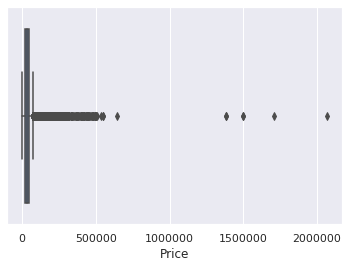

In [25]:
sns.boxplot(x=cars_df["Price"])

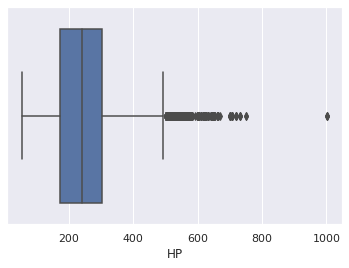

In [26]:
sns.boxplot(x=cars_df["HP"])

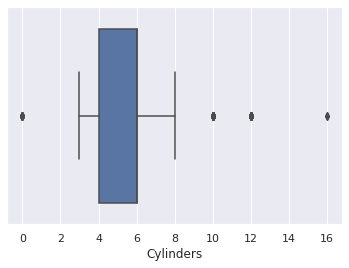

In [27]:
sns.boxplot(x=cars_df['Cylinders'])

In [30]:
# Print the Inter-Quartile Range
Q1 = cars_df.quantile(0.25)
Q3 = cars_df.quantile(0.75)
IQR = Q3 - Q1
print(IQR)

Year             9.0
HP             130.0
Cylinders        2.0
MPG-H            8.0
MPG-C            6.0
Price        21327.5
dtype: float64


In [31]:
cars_df = cars_df[~((cars_df < (Q1-1.5 * IQR)) |(cars_df > (Q3 + 1.5 * IQR))).any(axis=1)]
cars_df.shape

(9191, 10)

As seen above there were around 1600 rows were outliers. But you cannot completely remove the outliers because even after you use the above technique there maybe 1–2 outlier unremoved but that ok because there were more than 100 outliers.

### Plot scatter plots

We generally use scatter plots to find the correlation between two variables. Here the scatter plots are plotted between Horsepower and Price and we can see the plot below. With the plot given below, we can easily draw a trend line. These features provide a good scattering of points.

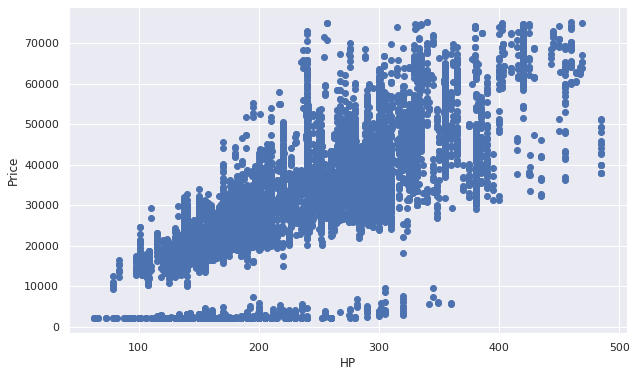

In [32]:
# Plotting a scatter plot
fig, ax = plt.subplots(figsize=(10,6))
ax.scatter(cars_df["HP"], cars_df["Price"])
ax.set_xlabel("HP")
ax.set_ylabel("Price")
plt.show()

### Plot Histograms

Histogram refers to the frequency of occurrence of variables in an interval. In this case, there are mainly 10 different types of car manufacturing companies, but it is often important to know who has the most number of cars. To do this histogram is one of the trivial solutions which lets us know the total number of car manufactured by a different company.

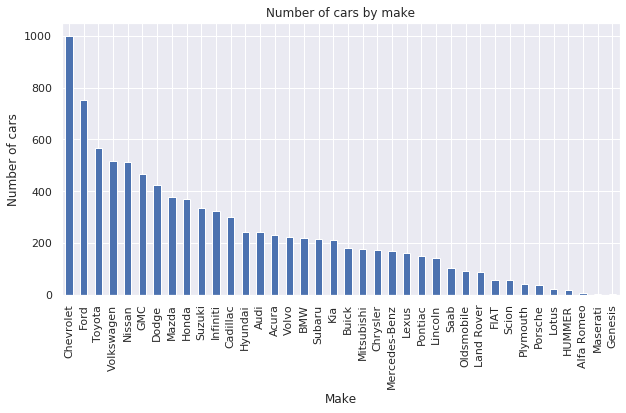

In [33]:
# Plotting a Histogram
cars_df.Make.value_counts().nlargest(40).plot(kind="bar", figsize=(10,5))
plt.title("Number of cars by make")
plt.ylabel("Number of cars")
plt.xlabel("Make");

### Plot Heatmaps

Heat Maps is a type of plot which is necessary when we need to find the dependent variables. One of the best way to find the relationship between the features can be done using heat maps. In the below heat map we know that the price feature depends mainly on the Engine Size, Horsepower, and Cylinders.

,Year,HP,Cylinders,MPG-H,MPG-C,Price
Year,1.000000,0.326726,-0.133920,0.378479,0.338145,0.592983
HP,0.326726,1.000000,0.715237,-0.443807,-0.544551,0.739042
Cylinders,-0.133920,0.715237,1.000000,-0.703856,-0.755540,0.354013
MPG-H,0.378479,-0.443807,-0.703856,1.000000,0.939141,-0.106320
MPG-C,0.338145,-0.544551,-0.755540,0.939141,1.000000,-0.180515
Price,0.592983,0.739042,0.354013,-0.106320,-0.180515,1.000000


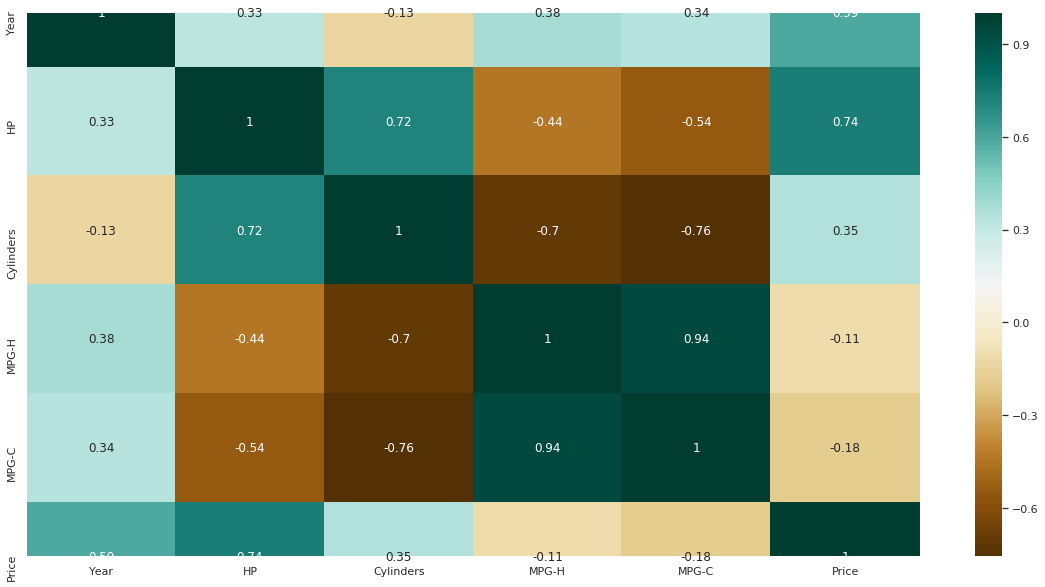

In [34]:
# Finding the relations between the variables.
plt.figure(figsize=(20,10))
c= cars_df.corr()
sns.heatmap(c,cmap="BrBG",annot=True)
c

### Conclusions

Using the scatter plot and heatmap, we can choose to build a model that could be able to predict the price of a car since we are able to identify the dependent variable as well as the target variable.